In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
def generate_data(N, ensemble_size):
    u_n = np.random.uniform(0,1,(N+3,ensemble_size))
    x_n = 0.1*u_n[3:N+3] + 1*u_n[2:N+2]-0.1*u_n[1:N+1]+0.01*u_n[:N]
    return x_n

X = generate_data(1000,1000)
print(2.0/3*np.mean(np.square(X)))


0.2268230783783622


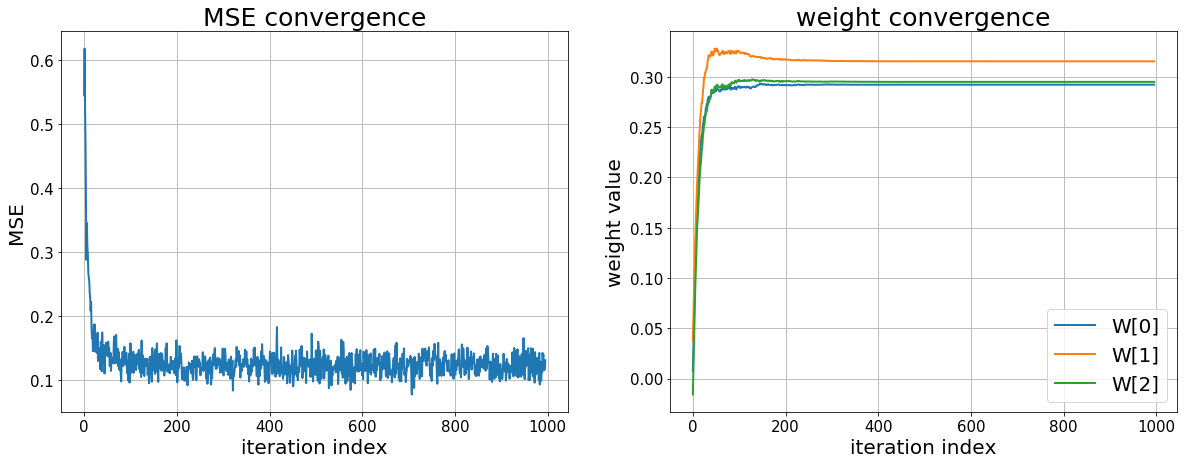

In [10]:
N=1000
ensemble_size = 100

W_track = []
loss_track = []

mu=0.1

W = np.random.uniform(-1,1,(3,ensemble_size))
X = generate_data(N,ensemble_size)
for n in range(3,N-1):
    mu = mu/2.0 if n%50==0 else mu
    X_hat = np.sum(W*np.flip(X[n-2:n+1]),axis=0) #W[0]*X[n]+W[1]*X[n-1]+W[2]*X[n-2]
    D = X[n+1]
    E = D-X_hat
    loss = np.square(E)
    loss_track.append(loss)
    
    W_track.append(W)
    W = W+mu*E*np.flip(X[n-2:n+1])

loss_track = np.asarray(loss_track)
W_track = np.asarray(W_track)

plt.figure(figsize=(20,7))
ax=plt.subplot(121)
line1, = ax.plot(np.arange(loss_track.shape[0]),np.mean(loss_track,axis=1),linewidth=2)
#color = line1.get_color()
#line2 = ax.fill_between(np.arange(loss_track.shape[0]),np.max(loss_track,axis=1),
                         #np.min(loss_track,axis=1),
                         #color=color, alpha=0.3)
ax.grid()
ax.set_xlabel('iteration index',fontsize=20)
ax.set_ylabel('MSE',fontsize=20)
ax.tick_params(axis='both',labelsize=15)
ax.set_title('MSE convergence',fontsize=25)

ax = plt.subplot(122)
for i in range(3):
    line, = ax.plot(np.arange(loss_track.shape[0]),np.mean(W_track,axis=2)[:,i],linewidth=2,label='W['+str(i)+']')
ax.legend(loc=0,fontsize=20)
ax.grid()
ax.set_xlabel('iteration index',fontsize=20)
ax.set_ylabel('weight value',fontsize=20)
ax.tick_params(axis='both',labelsize=15)
ax.set_title('weight convergence',fontsize=25)
plt.show()
    

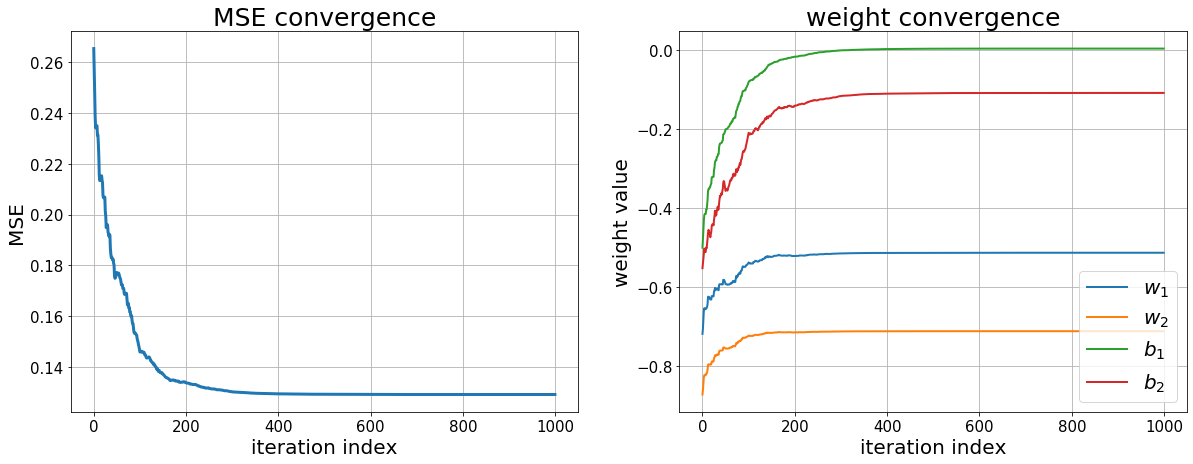

In [12]:
N=1000

W1_track = []
B1_track = []
W2_track = []
B2_track = []
loss_track = []

mu=0.1

W1 = np.random.uniform(-1,1)
B1 = np.random.uniform(-1,1)
W2 = np.random.uniform(-1,1)
B2 = np.random.uniform(-1,1)

Xs = np.random.uniform(-1,1,(N))
X_test = np.arange(-1,1,0.01)

for n in range(N):
    mu = mu/2.0 if n%50==0 else mu
    X = Xs[n]
    U = W1*X + B1
    U_squared = np.square(U)
    V = W2*U_squared+B2
    Y=np.true_divide(1,1+np.exp(-V))
    D = np.log(2+X)
    E = D-Y
    
    #test
    U_test = W1*X_test + B1
    U_squared_test = np.square(U_test)
    V_test = W2*U_squared_test+B2
    Y_test=np.true_divide(1,1+np.exp(-V_test))
    D_test = np.log(2+X_test)
    E_test = D_test-Y_test 
    loss = np.mean(np.square(E_test))
    loss_track.append(loss)
    
    W1_track.append(W1)
    W2_track.append(W2)
    B1_track.append(B1)
    B2_track.append(B2)
    
    W1 = W1+4*mu*E*Y*(1-Y)*U*W2*X
    B1 = B1+4*mu*E*Y*(1-Y)*U*W2
    W2 = W2+2*mu*E*Y*(1-Y)*U_squared
    B2 = B2+2*mu*E*Y*(1-Y)
    
loss_track = np.asarray(loss_track)
#print(loss_track.shape)
W1_track = np.asarray(W1_track)
W2_track = np.asarray(W2_track)
B1_track = np.asarray(B1_track)
B2_track = np.asarray(B2_track)

plt.figure(figsize=(20,7))
ax=plt.subplot(121)
line1, = ax.plot(np.arange(N),loss_track,linewidth=3)
#color = line1.get_color()
#line2 = ax.fill_between(np.arange(loss_track.shape[0]),np.max(loss_track,axis=1),
                         #np.min(loss_track,axis=1),
                         #color=color, alpha=0.3)
ax.grid()
ax.set_xlabel('iteration index',fontsize=20)
ax.set_ylabel('MSE',fontsize=20)
ax.tick_params(axis='both',labelsize=15)
ax.set_title('MSE convergence',fontsize=25)

ax = plt.subplot(122)
line, = ax.plot(np.arange(N),W1_track,linewidth=2,label=r'$w_1$')
line, = ax.plot(np.arange(N),W2_track,linewidth=2,label=r'$w_2$')
line, = ax.plot(np.arange(N),B1_track,linewidth=2,label=r'$b_1$')
line, = ax.plot(np.arange(N),B2_track,linewidth=2,label=r'$b_2$')
ax.legend(loc=0,fontsize=20)
ax.grid()
ax.set_xlabel('iteration index',fontsize=20)
ax.set_ylabel('weight value',fontsize=20)
ax.tick_params(axis='both',labelsize=15)
ax.set_title('weight convergence',fontsize=25)
plt.show()